# Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Attribute Information:
ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

Personal Loan : Did this customer accept the personal loan offered in the last campaign?

Securities Account : Does the customer have a securities account with the bank?

CD Account : Does the customer have a certificate of deposit (CD)account with the bank?

Online : Does the customer use internet banking facilities?

Credit card : Does the customer use a credit card issued by UniversalBank?

#Learning Outcomes:

Exploratory Data Analysis

Preparing the data to train a model

Training and making predictions using a classification model

Model evaluation

# Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks:

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings (15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

# References:

https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/

https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/

**Dependent Variable:** 
Likelihood of a liability customer buying personal loans.

In [1]:
# importing standard libraries
import numpy as np              # for mathematical caluculations
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import seaborn as sns           # for data visualization
import scipy.stats as stats     # some useful stuff
import warnings                 # to ignore any warnings
warnings.filterwarnings("ignore")

**1. Read the column description and ensure you understand each attribute well**

- Load the data into a data-frame. The data-frame should have data and column description.


In [2]:
# Reading the data
# csv file needs to be in the google drive if using colab
# csv file needs to be in the same location as ipynb if using notebook
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_cp=df.copy() #  Copy of the dataset
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
# Description of the variable and data shape
print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


There are 5000 rows,13 independent variables and 1 Dependent variable

- Ensure the attribute types are correct. If not, take appropriate actions.

In [4]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

- Transform the data i.e. scale / normalize if required

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#df.notnull()

**Inferences:**
No nan or null in any column in the data set, 0 missing cells
All the variable are numerical 

**2. Study the data distribution in each attribute, share your findings (15 marks)**

**Univariate Analysis:**

In [7]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [8]:
!pip install pandas_profiling
import pandas_profiling

In [9]:
df.profile_report()

**Inferences:**
- 0 missing values and duplicate rows.
- 7 Numerical variables ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’.
- 5 Boolean variables ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’.
- 2 Categorical variables ‘Education’, ‘Family’.
- Mean age is 45 with std. deviation 11, distribution is almost symmetrical.
- Anual income distribution is moderately right or positive skewed.
- Credit card average spending distribution is highly Right or positive skewed.
- House mortgage distribution is highly Right or positive skewed with lot of outliers.
- Majority of the people are at Under graduation level and Majority are single.
- 90% do not accept personal loans, 90% do not have security account, 94% do not have CD account, 60% use internet banking, 71% do not use Universal bank credit card.
- Age has high correlation with Experience. Personal Loan has good correlation with Income, Credit card average spending and CD Account with the bank.

In [10]:
#df.hist(figsize=(20,30));

Remove # to view individual responses

In [11]:
#print(df.ID.describe())
#df.ID.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)

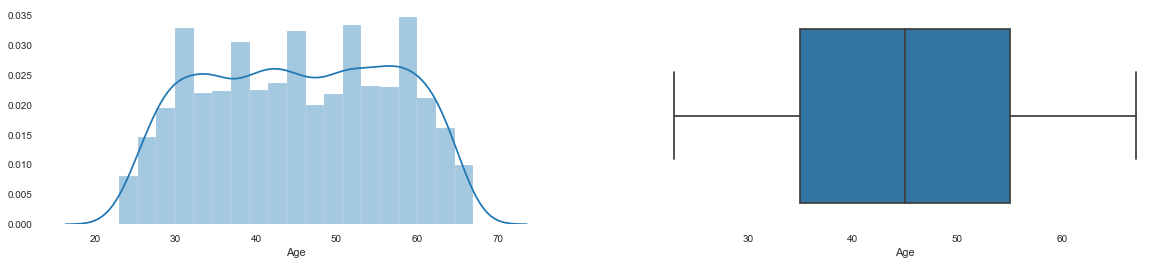

In [12]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Age'])

f.add_subplot(1,2,2)
sns.boxplot(df['Age'])

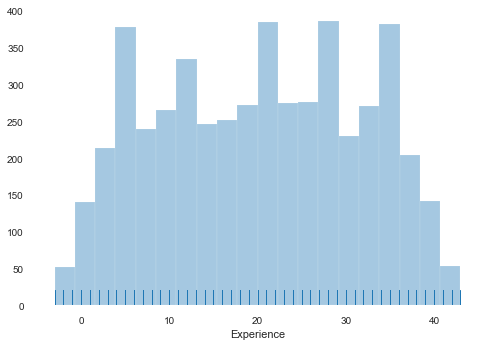

In [13]:
sns.distplot(df['Experience'], kde=False, rug=True);

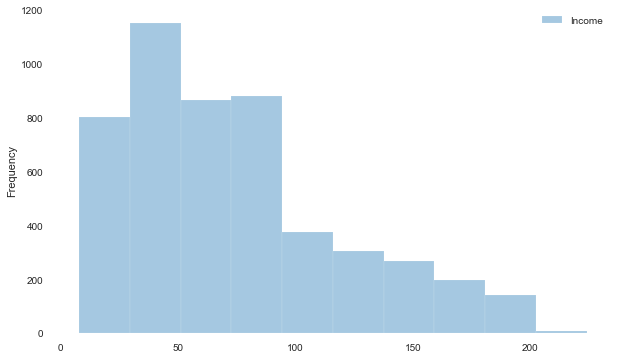

In [14]:
df.Income.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)
#df.Income.plot.kde(bw_method=3)

In [15]:
#print(df["ZIP Code"].describe())
#df["ZIP Code"].plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)

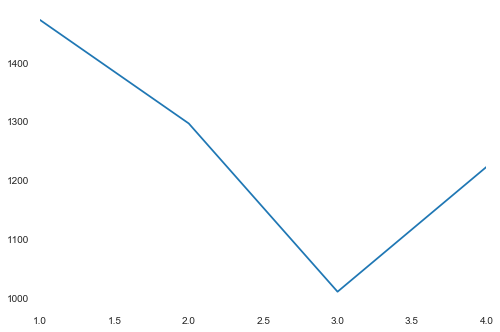

In [16]:
#print(df.Family.describe())
df.Family.value_counts().sort_index().plot.line()

In [17]:
#print(df.CCAvg.describe())
#df.CCAvg.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True)
#sns.catplot(x="Personal Loan", y="CCAvg", hue="CreditCard", kind="violin", data=df); #violin or box

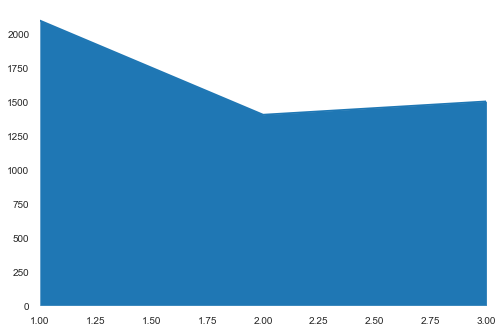

In [18]:
#print(df.Education.describe())
df.Education.value_counts().sort_index().plot.area();

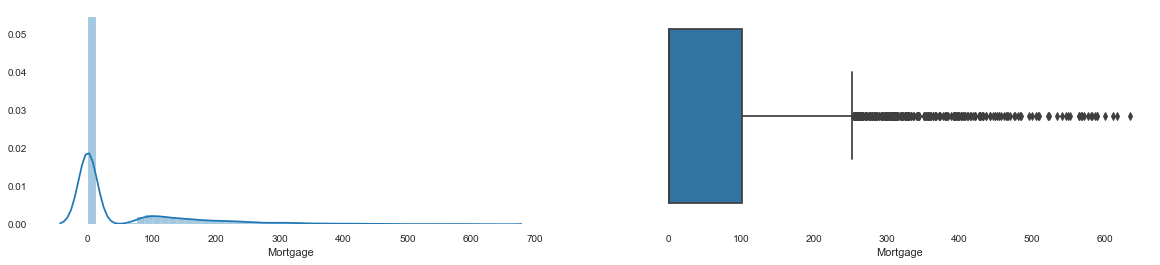

In [19]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Mortgage'])

f.add_subplot(1,2,2)
sns.boxplot(df['Mortgage'])
#df.Mortgage.plot(kind='hist', figsize=[10,6], alpha=.4, legend=True);

Number of Buyers: 480 (9.60%)
Number of Non Buyers: 4520 (90.40%)


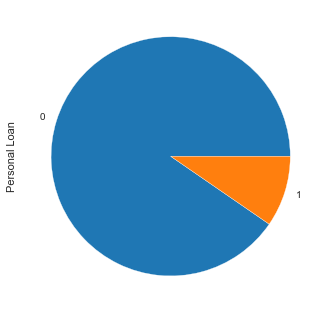

In [20]:
df['Personal Loan'].value_counts().sort_index().plot.pie();
n_buy = len(df[df['Personal Loan'] == 1])
n_nobuy = len(df[df['Personal Loan'] == 0])
print("Number of Buyers: {0} ({1:2.2f}%)".format(n_buy, (n_buy / (n_buy + n_nobuy)) * 100 ))
print("Number of Non Buyers: {0} ({1:2.2f}%)".format(n_nobuy, (n_nobuy / (n_buy + n_nobuy)) * 100))

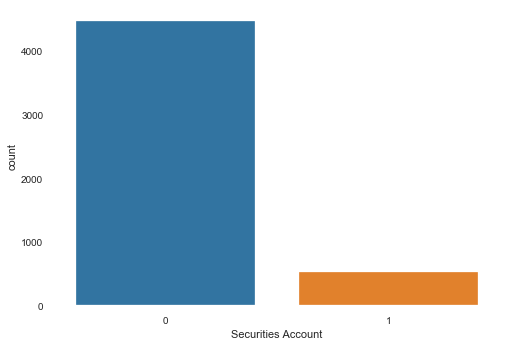

In [21]:
sns.countplot(df["Securities Account"])

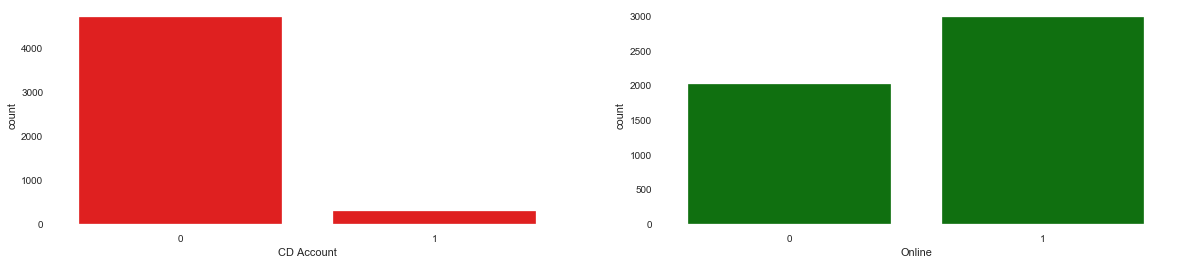

In [22]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.countplot(df['CD Account'], color='red')

f.add_subplot(1,2,2)
sns.countplot(df['Online'], color='green')

In [23]:
#df['Online'].value_counts().sort_index().plot.barh(title='Online')

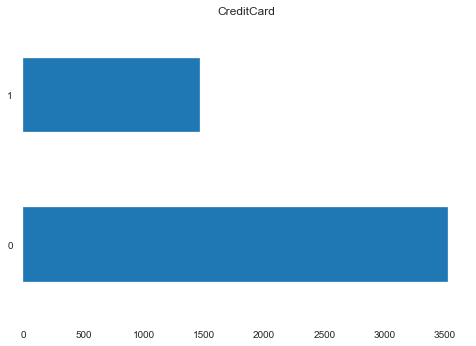

In [24]:
#print(df['CreditCard'].describe())
df['CreditCard'].value_counts().plot(kind='barh',title='CreditCard');

**Multivariate analysis**

In [25]:
#sns.pairplot(df)
#sns.pairplot(df[['Age', 'Income', 'Family','CCAvg','Personal Loan']])
#plt.show()

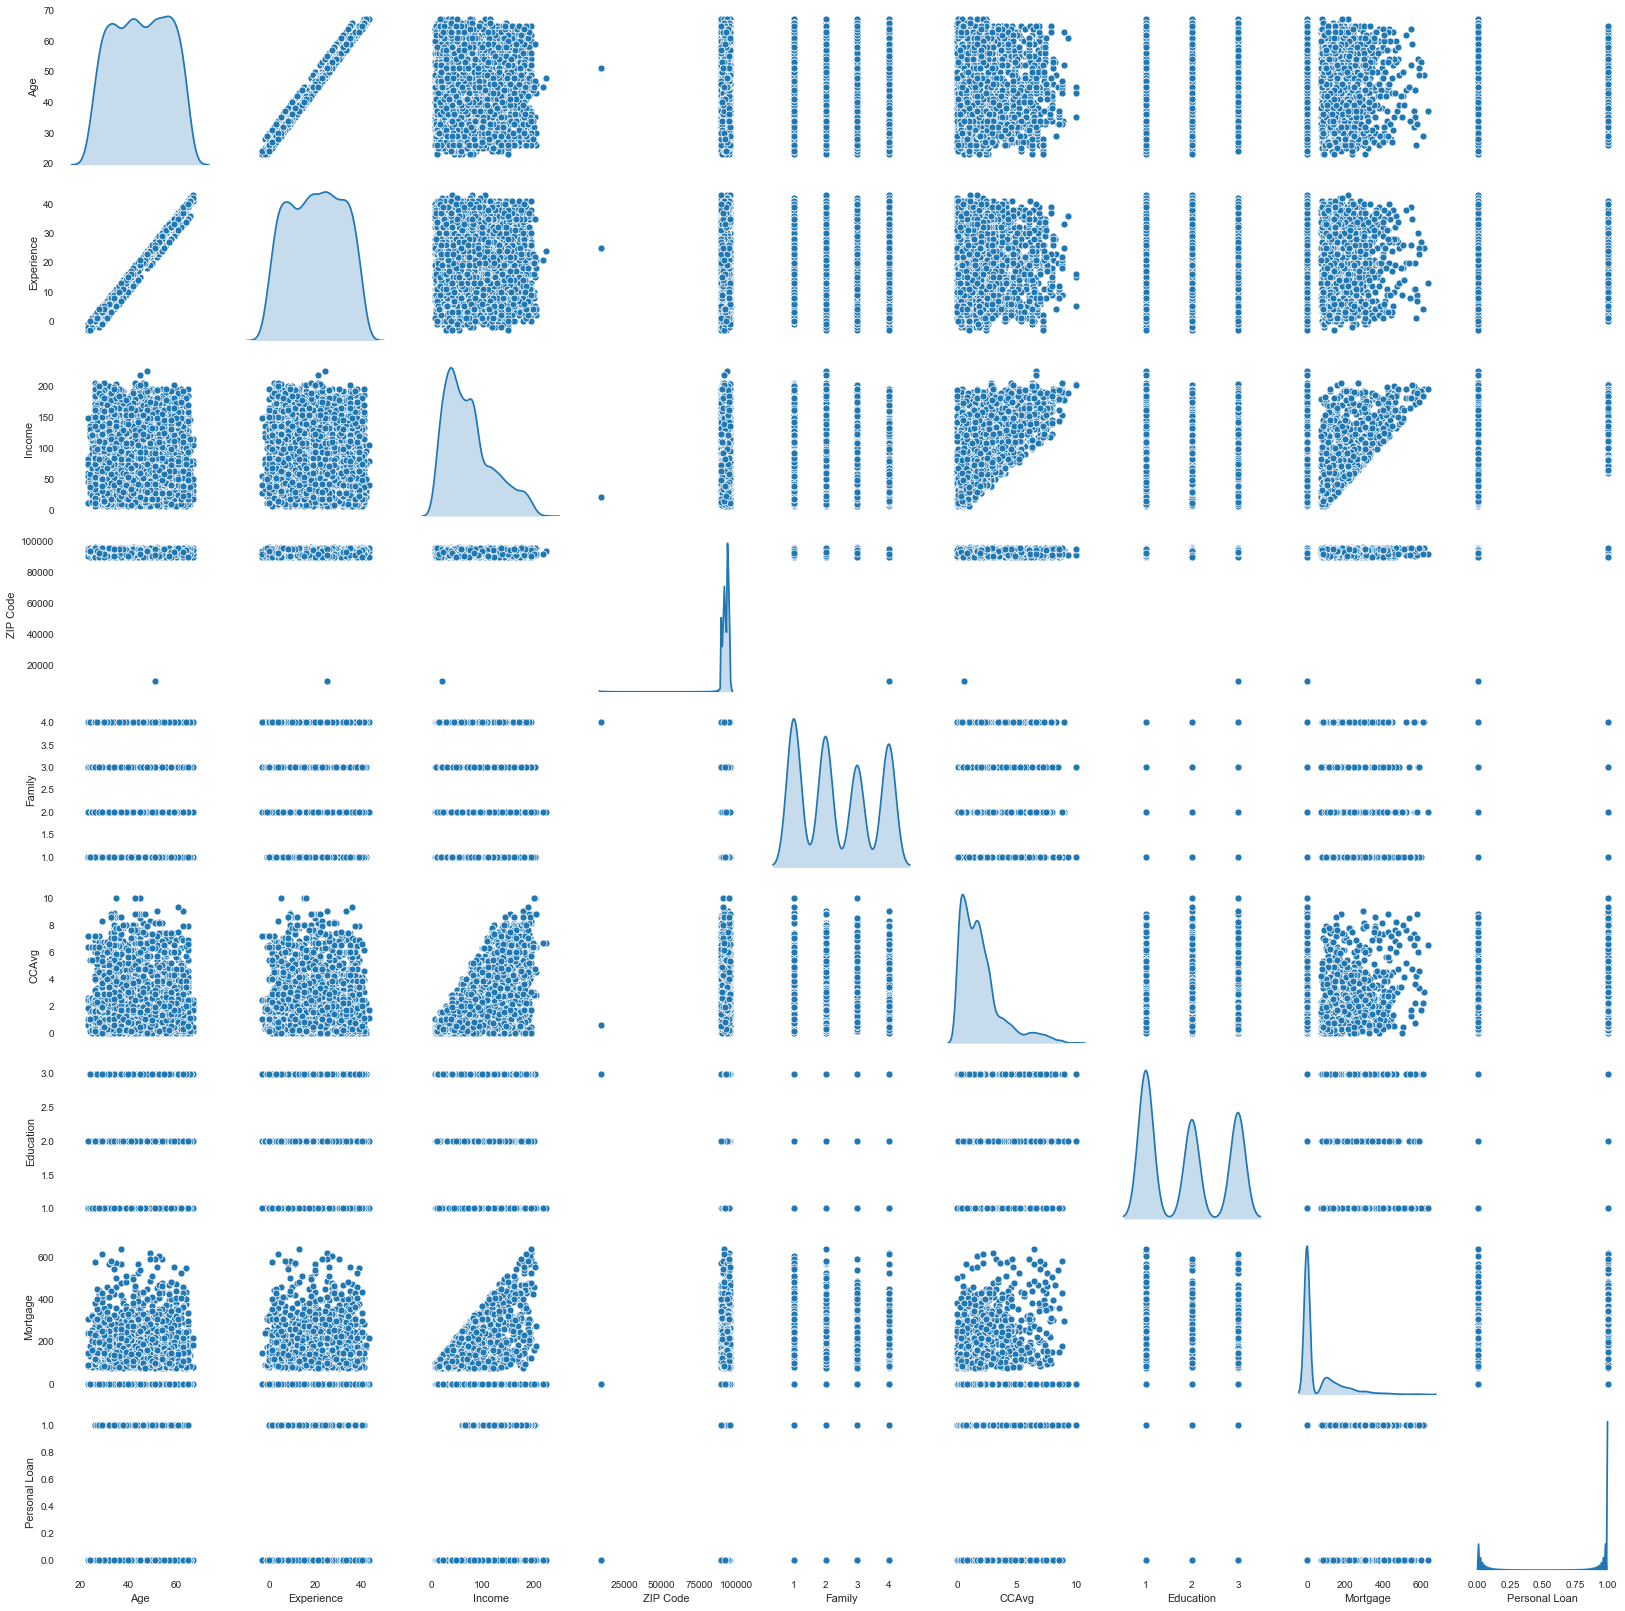

In [26]:
df_attr = df.iloc[:, 1:10]
sns.pairplot(df_attr, diag_kind='kde');   # to plot density curve instead of histogram on the diag

In [27]:
corr = df.corr()
corr

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

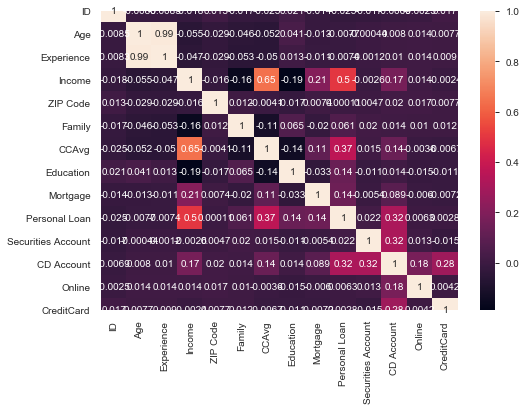

In [28]:
sns.heatmap(corr, annot=True);

**Inference**

Age and Experience have linear relationship with high correlation.

Personal Loan has good correlation with Income, Credit card average spending and CD Account with the bank. 

There is a high probability of high Income people spending on Credit Cards and Mortgage

**Strategies to address the different data challenges such as data pollution, outliers and missing values.**

Drop ID, ZIP Code columns as they are just numbers, and drop Experience column as it has high correlation with Age.

In [29]:
# Run this only once
df1=df.drop(columns=['ID', 'ZIP Code', 'Experience'], axis=1)

In [30]:
df1.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [31]:
df1.shape

(5000, 11)

House mortgage distribution is highly Right or positive skewed with lot of outliers. Having outliers often has a significant effect on the mean and standard deviation and, hence affecting the distribution. Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the z-score.

In [32]:
#run this only once
df1['mg_zs']=np.abs(stats.zscore(df1['Mortgage']))
df2=df1[df1['mg_zs']<3]
df3=df2.drop('mg_zs',axis=1)

In [33]:
df2.shape

(4895, 12)

In [34]:
df3.shape

(4895, 11)

Rows with z-score < 3 are only kept for further model building and analysis and more than 100+ rows which contain outliers are dropped.

**3. Get the target column distribution. Your comments (5 marks)**

Target Column Distribution - In our case 'Personal Loan' is Target Variable

Data Distribution of 'Personal Loan' across all variables


**Categorical Independent Variable vs Target Variable**

Hypothesis: People of the following conditions will have more potential to buy personal loans.
- Bigger families
- Graduates and Advanced/Professionals

('Family','Education') vs ('Personal Loan')

Family size vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134 

Cross Tabulation in percntage:  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


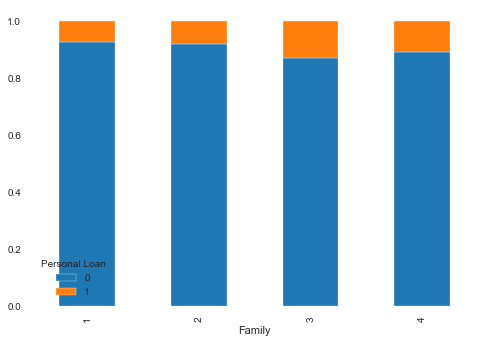

In [35]:
fm=pd.crosstab(df['Family'], df['Personal Loan'])
fmp=fm.div(fm.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', fm,'\n')
print('Cross Tabulation in percntage: ','\n', fmp)
fmp.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference**

From the above plot, the family size is not siginificantly affecting the probability of buying the personal loans, hence the Hypothesis is False.

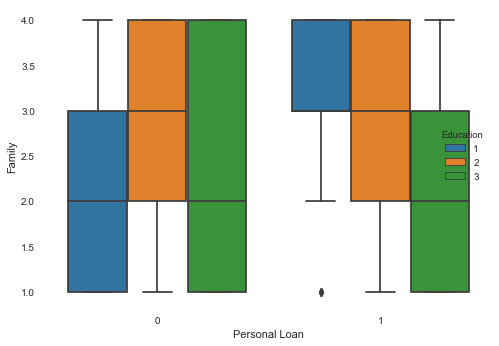

In [36]:
sns.boxplot(df['Personal Loan'], df['Family'],hue=df['Education'])

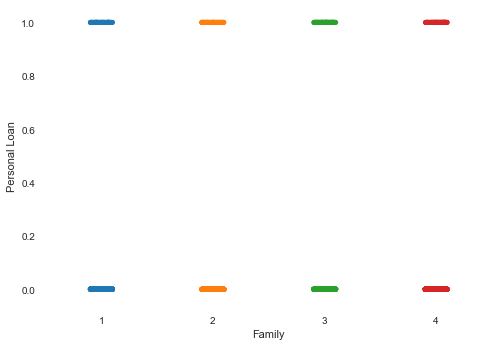

In [37]:
sns.stripplot(df['Family'],df['Personal Loan'])

Education level vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205 

Cross Tabulation in percntage:  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


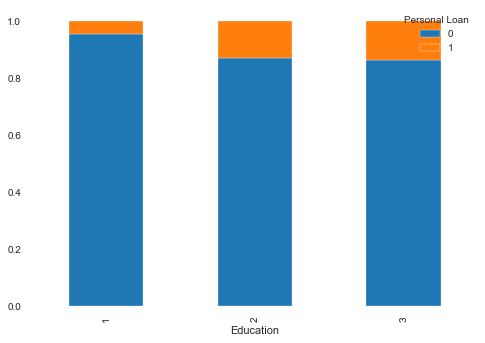

In [38]:
ed=pd.crosstab(df['Education'], df['Personal Loan'])
edp=ed.div(ed.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', ed,'\n')
print('Cross Tabulation in percntage: ','\n', edp)
edp.plot(kind='bar',stacked=True); # ; to hide axes information

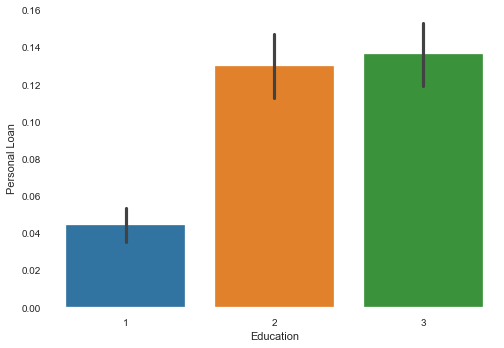

In [39]:
sns.barplot(df['Education'], df['Personal Loan']);

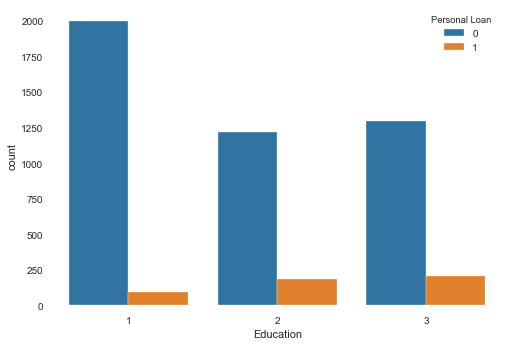

In [40]:
sns.countplot(x="Education", hue="Personal Loan", data=df)

**Inference**

From the above plots, it is evident that there is a higher probability of Graduates and Professionals buying the personal loans compared to Under graduates. Hence the Hypothesis is True.

**Numerical Independent Variable vs Target Variable:**

Hypothesis: People of the following conditions will have more potential to buy personal loans.
- Ages between 30-50
- Mid level and low level income

(‘Age’, ‘CCAvg’ ‘Income’, ‘Mortgage’, ‘Experience’) vs (‘Personal Loan’)

- Age has high correlation with Experience, so we should expect same inference for both.

Using groupby function to find the mean of the numeric independent variable for which the customers buy the personal loan vs the mean of the numeric variables who don’t.

Age vs Personal Loan:

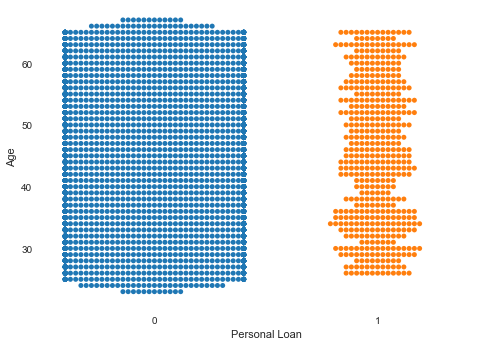

In [41]:
sns.swarmplot(df['Personal Loan'],df['Age']) # this needs no overlap points

Text(0, 0.5, 'Mean')

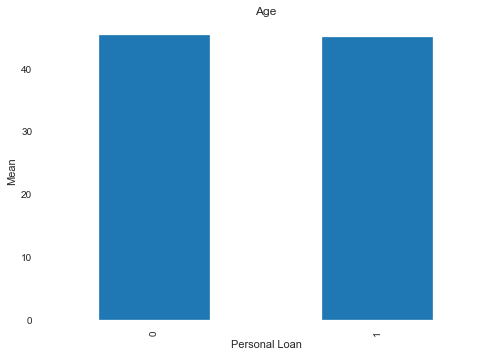

In [42]:
df.groupby('Personal Loan')['Age'].mean().plot(kind='bar');
plt.title('Age')
plt.xlabel('Personal Loan')
plt.ylabel('Mean')

Cross Tabulation:  
 Personal Loan     0    1
Age_bin                 
Beginner       1128  134
Junior         1131  114
Senior         1147  118
Old            1102  114 

Cross Tabulation in percntage:  
 Personal Loan         0         1
Age_bin                          
Beginner       0.893819  0.106181
Junior         0.908434  0.091566
Senior         0.906719  0.093281
Old            0.906250  0.093750


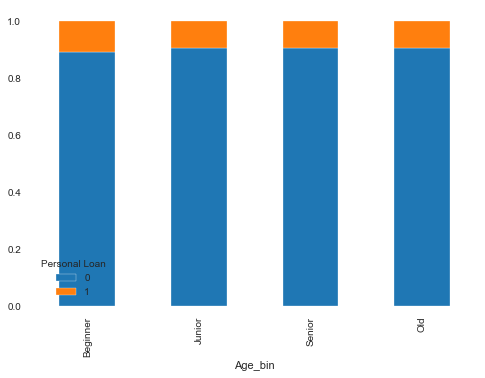

In [43]:
# we dont see any change in the mean ages between buyer and no buyer of Personal loans
# Lets split the Age into categories and use stacked bar plot using cross tabulation.
bins=[23,35,45,55,67]
group=['Beginner','Junior','Senior','Old']
df['Age_bin']=pd.cut(df['Age'],bins,labels=group) # converting Numerical to Categorical
age=pd.crosstab(df['Age_bin'], df['Personal Loan'])
agep=age.div(age.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', age,'\n')
print('Cross Tabulation in percntage: ','\n', agep)
agep.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference**

From the above plot, Age is not siginificantly affecting the probability of buying the personal loans, hence the Hypothesis is False.

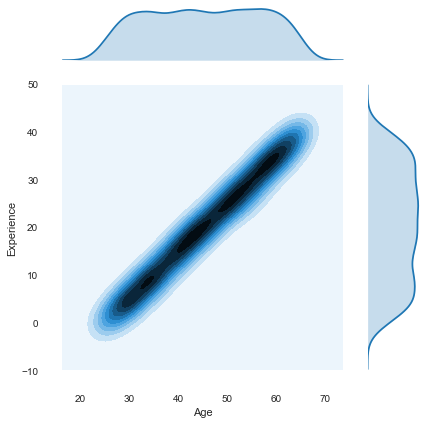

In [44]:
#kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
sns.jointplot(df['Age'], df['Experience'], kind="kde")
plt.show()

Age and Expereince have linear relationship

Income vs Personal Loan:

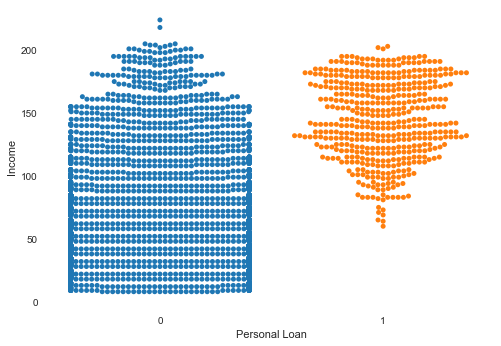

In [45]:
sns.swarmplot(df['Personal Loan'], df['Income'])

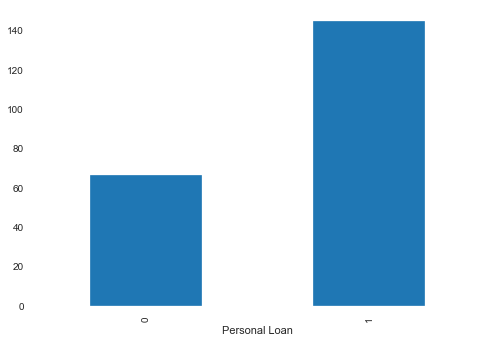

In [46]:
df.groupby('Personal Loan')['Income'].mean().plot(kind='bar');

**Inference:**
From th above plot, the mean of Income for the Personal Loan buyers is high, hence our Hypothesis of low and middle income people buying Personal Loans is False.

CCAvg vs Personal Loan:

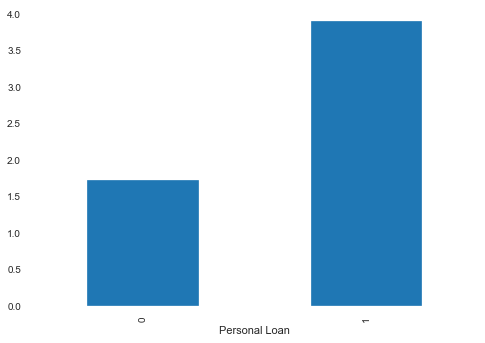

In [47]:
df.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar');

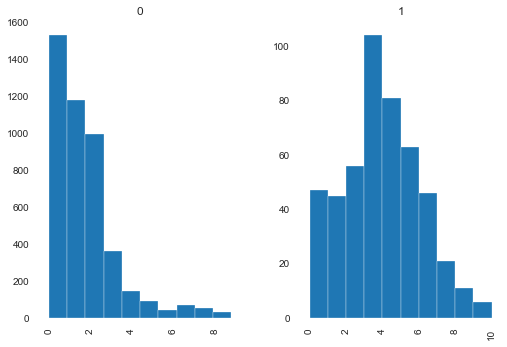

In [48]:
df.hist(by='Personal Loan',column = 'CCAvg');

**Inference:**
From the above plot, People with higer Credit card average spending is more viable for buying Personal Loan.

Mortgage vs Personal Loan:

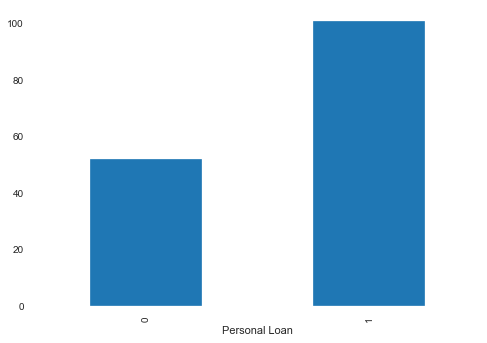

In [49]:
df.groupby('Personal Loan')['Mortgage'].mean().plot(kind='bar');

**Inference:**
From the above plot, People with Mortgage is more viable for buying Personal Loan.

**Boolean Independent Variable vs Target Variable:**

Hypothesis: People of the following conditions will have more potential to buy personal loans.
- Ages between 30-50
- Mid level and low level income

(‘Securities Account’, ‘CD Account’, ‘Online’, ‘CreditCard’) vs (‘Personal Loan’)

Securities Account vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60 

Cross Tabulation in percntage:  
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


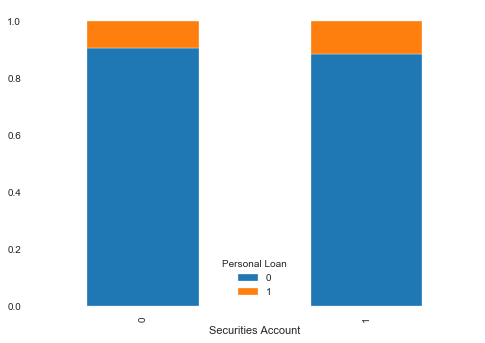

In [50]:
sa=pd.crosstab(df['Securities Account'], df['Personal Loan'])
sap=sa.div(sa.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', sa,'\n')
print('Cross Tabulation in percntage: ','\n', sap)
sap.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference:**
The customer who have or doesn't have a Seccutiries Account doesn’t seem to affect the probability of buying a personal loan.

CD Account vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140 

Cross Tabulation in percntage:  
 Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


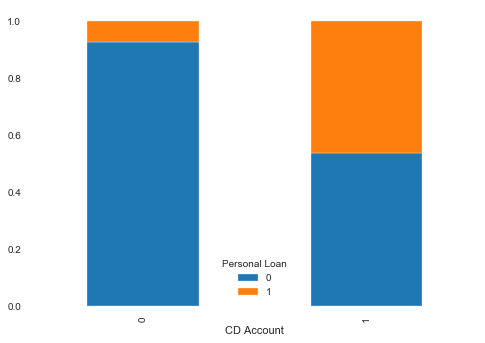

In [51]:
cd=pd.crosstab(df['CD Account'], df['Personal Loan'])
cdp=cd.div(cd.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', cd,'\n')
print('Cross Tabulation in percntage: ','\n', cdp)
cdp.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference:**
The customers who have a certificate of deposit (CD) account with the bank seem to buy personal loans from the bank.

Online vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291 

Cross Tabulation in percntage:  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


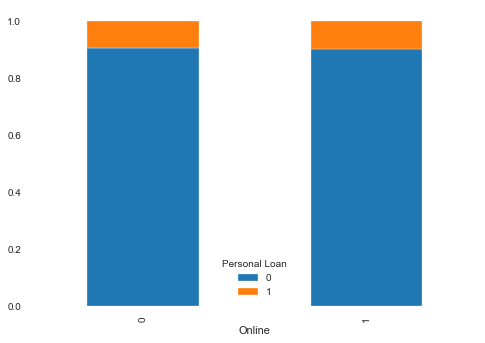

In [52]:
ol=pd.crosstab(df['Online'], df['Personal Loan'])
olp=ol.div(ol.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', ol,'\n')
print('Cross Tabulation in percntage: ','\n', olp)
olp.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference:**
The customer who uses or doesn’t use a Internet Banking doesn’t seem to affect the probability of buying a personal loan.

CreditCard vs Personal Loan: Stacked bar plot using Cross tabulation of 2 or more factors:

Cross Tabulation:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143 

Cross Tabulation in percntage:  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


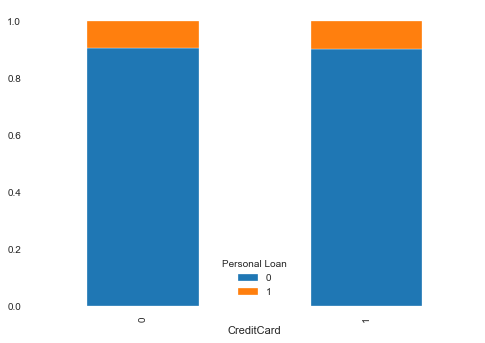

In [53]:
cc=pd.crosstab(df['CreditCard'], df['Personal Loan'])
ccp=cc.div(cc.sum(1).astype(float),axis=0) # percentage
print('Cross Tabulation: ', '\n', cc,'\n')
print('Cross Tabulation in percntage: ','\n', ccp)
ccp.plot(kind='bar',stacked=True); # ; to hide axes information

**Inference:**
The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

**4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)**

- Create the training set and test set in ration of 70:30 

We will use 70% of data for training and 30% for testing.

Model Building to predict the target variable:

scikit-learn (sklearn) is an open-source library for Python for making different models. It is one of the most efficient tools which contains many inbuilt functions that can be used for modeling in Python.Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the dataset and save it in another dataset with the help of train_test_split function in the model_selection library of sklearn.

In [54]:
from sklearn.model_selection import train_test_split  # Library for data split
from sklearn.linear_model import LogisticRegression # Model importing
from sklearn import metrics
from sklearn.metrics import accuracy_score # Library to check accuracy of model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [55]:
print(df3.shape)
X=df3.drop('Personal Loan',axis=1) # set for independent variale
y=df3['Personal Loan']             # set for dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # data split
# 1 is just any random seed number
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df3.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df3.index)) * 100))
x_train.head()

(4895, 11)
69.99% data is in training set
30.01% data is in test set


Age  Income  Family  CCAvg  Education  Mortgage  Securities Account  \
3402   64      95       2    0.0          3         0                   0   
4688   29      69       4    1.8          2         0                   0   
4505   40      90       4    1.1          2         0                   1   
2238   48      35       1    1.4          3         0                   0   
3      35     100       1    2.7          2         0                   0   

      CD Account  Online  CreditCard  
3402           0       1           1  
4688           0       1           1  
4505           0       1           0  
2238           0       1           0  
3              0       0           0

In [56]:
print(X.shape[1]+1)

11


**5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)**

Null hypothesis: non-buyer because there are more 0s than 1s, Alternate hypothesis: buyer

**Next**
- Create Logistic Regression algorithm. Note the model performance.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event. This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function


In [57]:
#Logistic Regression Model
LogRm=LogisticRegression() # may use solver="liblinear"
LogRm.fit(x_train,y_train) # Fit the model on training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# predict on test
y_pred = LogRm.predict(x_test) 

**Print Confusion Matrix & Print Classification Report to check precision, recall & F1 Score**

In [59]:
AS1=accuracy_score(y_test,y_pred)
CM1=confusion_matrix(y_test,y_pred)
CR1=classification_report(y_test,y_pred)
print('Accuracy Score: ', '\n', AS1,'\n')
print('Confusion Matrix: ','\n', CM1,'\n')
print('Classification Report: ','\n', CR1,'\n')

Accuracy Score:  
 0.9469026548672567 

Confusion Matrix:  
 [[1325   16]
 [  62   66]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.80      0.52      0.63       128

    accuracy                           0.95      1469
   macro avg       0.88      0.75      0.80      1469
weighted avg       0.94      0.95      0.94      1469
 



In [60]:
#Logistic Regression Probability
LogRp=LogRm.predict_proba(x_test)

**Create Roc Curve and calculate the fpr and tpr for all thresholds of the classification**

FPR: 
 [0.         0.         0.         0.00149142 0.00149142 0.00298285
 0.00298285 0.00372856 0.00372856 0.00447427 0.00447427 0.00521999
 0.00521999 0.00671141 0.00671141 0.00745712 0.00745712 0.00894855
 0.00894855 0.01267711 0.01267711 0.01342282 0.01342282 0.01416853
 0.01416853 0.01491424 0.01491424 0.01565996 0.01565996 0.01640567
 0.01640567 0.01715138 0.01715138 0.01789709 0.01789709 0.01938852
 0.01938852 0.02013423 0.02013423 0.02087994 0.02087994 0.02237136
 0.02237136 0.0246085  0.0246085  0.02759135 0.02759135 0.03281133
 0.03281133 0.03355705 0.03355705 0.03430276 0.03430276 0.03579418
 0.03579418 0.03803132 0.03803132 0.04026846 0.04026846 0.0432513
 0.0432513  0.04474273 0.04474273 0.04548844 0.04548844 0.04623415
 0.04623415 0.04996271 0.04996271 0.0551827  0.0551827  0.05592841
 0.05592841 0.05667412 0.05667412 0.06040268 0.06040268 0.06413125
 0.06413125 0.06860552 0.06860552 0.06935123 0.06935123 0.08873975
 0.08873975 0.09246831 0.09246831 0.09917972 0.09917972 

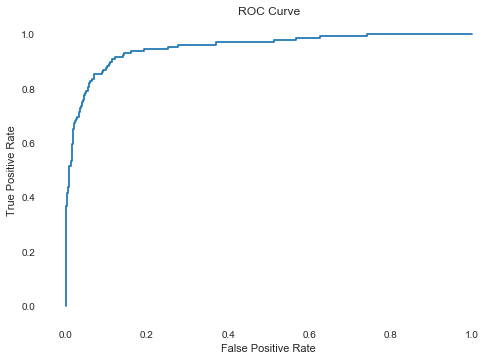

Area Under the Curve: 0.950841 



In [61]:
fpr1,tpr1,threshold1=roc_curve(y_test,LogRp[:,1])
roc_auc1=auc(fpr1,tpr1)
print('FPR:','\n', fpr1 ,'\n','\n','TPR:','\n', tpr1)
plt.plot(fpr1, tpr1)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("Area Under the Curve: %f" % roc_auc1,"\n")

**Inference**
Model Evaluation:

Accuracy = 95 %, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

Type I error (FP)— Actually null hypothesis(non buyer) but predicted alternate hypothesis (buyer) by the model,
Type II error (FN)— Actually alternate hypothesis(buyer) but predicted null hypothesis(non buyer) by the model.
We need to reduce type II error since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.

**Next**

**Standardization:** If any affect on the results:

Compare features that have different units or scales.

Later, when you’re running models (logistic regression, SVMs, perceptron’s, neural networks, etc.) the estimated weights will update similarly rather than at different rates during the build process. This will give you more accurate results when the data has been first standardized.

In [62]:
from sklearn import preprocessing  # importing library
col_names=df3.columns              # getting clumn names
scaler=preprocessing.StandardScaler()  # create scaler object
scaled_x_train=scaler.fit_transform(x_train)# fit training data on the scaler object
scaled_x_test=scaler.fit_transform(x_test)

In [63]:
#Logistic Regression Model
LogRm=LogisticRegression() # may use solver="liblinear"
LogRm.fit(scaled_x_train,y_train) # Fit the model on training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# predict on test
y_pred = LogRm.predict(scaled_x_test)

In [65]:
AS2=accuracy_score(y_test,y_pred)
CM2=confusion_matrix(y_test,y_pred)
CR2=classification_report(y_test,y_pred)
print('Accuracy Score: ', '\n', AS2,'\n')
print('Confusion Matrix: ','\n', CM2,'\n')
print('Classification Report: ','\n', CR2,'\n')

Accuracy Score:  
 0.9530292716133424 

Confusion Matrix:  
 [[1324   17]
 [  52   76]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469
 



In [66]:
LogRp=LogRm.predict_proba(scaled_x_test)

FPR: 
 [0.         0.         0.         0.00149142 0.00149142 0.00223714
 0.00223714 0.00447427 0.00447427 0.00521999 0.00521999 0.0059657
 0.0059657  0.00671141 0.00671141 0.00820283 0.00820283 0.00894855
 0.00894855 0.00969426 0.00969426 0.01491424 0.01491424 0.01715138
 0.01715138 0.01789709 0.01789709 0.0186428  0.0186428  0.01938852
 0.01938852 0.02237136 0.02237136 0.02311708 0.02311708 0.02609993
 0.02609993 0.02908277 0.02908277 0.02982849 0.02982849 0.03131991
 0.03131991 0.03355705 0.03355705 0.03579418 0.03579418 0.03728561
 0.03728561 0.03952274 0.03952274 0.04175988 0.04175988 0.04250559
 0.04250559 0.04548844 0.04548844 0.05145414 0.05145414 0.05219985
 0.05219985 0.05741984 0.05741984 0.06636838 0.06636838 0.06860552
 0.06860552 0.07084265 0.07084265 0.07531693 0.07531693 0.07829978
 0.07829978 0.09545116 0.09545116 0.098434   0.098434   0.10887397
 0.10887397 0.14168531 0.14168531 0.14765101 0.14765101 0.15063386
 0.15063386 0.15809098 0.15809098 0.16107383 0.16107383 

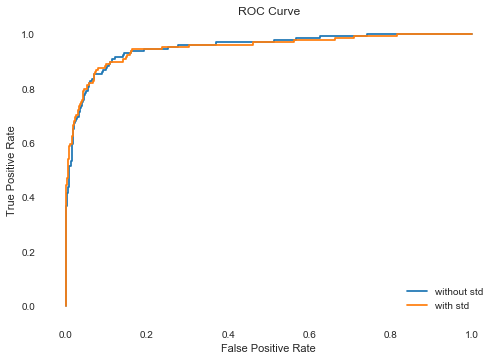

Area Under the Curve: 0.949501 



In [67]:
fpr2,tpr2,threshold2=roc_curve(y_test,LogRp[:,1])
roc_auc2=auc(fpr2,tpr2)
print('FPR:','\n', fpr2 ,'\n','\n','TPR:','\n', tpr2)
plt.plot(fpr1, tpr1,label='without std')
plt.plot(fpr2, tpr2,label='with std')
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show() 
print("Area Under the Curve: %f" % roc_auc2,"\n")

**Inferece**

No Big differenced with standardization:

Acuuracy remain same at 95%

Area Under the Curve changed from 0.950841 to 0.949501

Recall (specificity) changed from 52% to 59% (for Buyer), which means our model did much better in predicting True Negatives.

Further, we will analyze other models with this scaled data.

**Next**

- Logistic Regression with Hyper Parameter Tuning using GridSearchCV

A false negative is more serious to be ignored. At the same time, a false positive would lead to additional cost.
Let’s try to minimize the false negatives by using Grid Search to find the optimal parameters. Grid search can be used to improve any specific evaluation metric.

The metric we need to focus on to reduce false negatives is Recall.

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score # Libraries for Hyper parameter tuning
from sklearn.preprocessing import StandardScaler

In [69]:
#Logistic Regression Model
LogRm=LogisticRegression() # may use solver="liblinear"

In [70]:
#Grid Search
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(LogRm, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(scaled_x_train, y_train)

print('Best Penalty:', grid_clf_acc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_clf_acc.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 5


In [71]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(scaled_x_test)

**Print Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision, recall & F1 Score**

In [72]:
print('Accuracy Score: ', '\n', accuracy_score(y_test,y_pred_acc),'\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test,y_pred_acc),'\n')
print('Classification Report: ','\n', classification_report(y_test,y_pred_acc),'\n')

Accuracy Score:  
 0.9523485364193329 

Confusion Matrix:  
 [[1323   18]
 [  52   76]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.81      0.59      0.68       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469
 



**Inference**

No Big differenced with Hyper paramenter tuning with GridSearch.

Acuuracy remain same at 95%

Recall is same at 59%.

**KNN - K Nearest Neighbour**

kNN accuracy is better than other more complicated algorithms.
KNN is a supervised algorithm, it is non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression”.

It does not explicitly learn the model, but it saves all the training data and uses the whole training set for classification or prediction. This contrasts with other techniques like SVM, where you can discard all non-support vectors without any problem. This means that the training process is very fast, it just saves all the values from the data set. This causes huge memory consumption and time complexity at the testing time. But in general, it’s a very useful algorithm in case of small data sets (or if you have lots of time and memory) or for educational purposes.
Defaults: Weights=uniform, algorithm=auto, metric=Eucledian,n_nei=5

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# KNN Model
knnm=KNeighborsClassifier(n_neighbors=3) # or take dafault 5
knnm.fit(scaled_x_train,y_train) # fit train data on KNN model
y_pred=knnm.predict(scaled_x_test)

In [75]:
AS3=accuracy_score(y_test,y_pred)
CM3=confusion_matrix(y_test,y_pred)
CR3=classification_report(y_test,y_pred)
print('Accuracy Score: ', '\n', AS3,'\n')
print('Confusion Matrix: ','\n', CM3,'\n')
print('Classification Report: ','\n', CR3,'\n')

Accuracy Score:  
 0.9646017699115044 

Confusion Matrix:  
 [[1333    8]
 [  44   84]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.91      0.66      0.76       128

    accuracy                           0.96      1469
   macro avg       0.94      0.83      0.87      1469
weighted avg       0.96      0.96      0.96      1469
 



In [76]:
knnp=knnm.predict_proba(scaled_x_test)

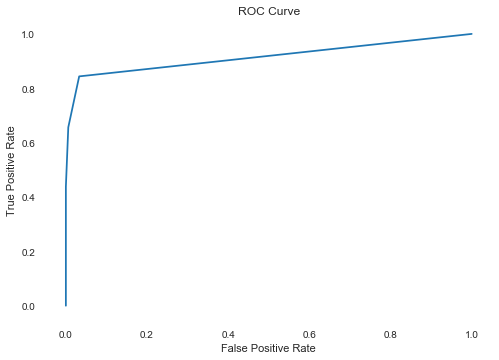

Area Under the Curve: 0.915024 



In [77]:
fpr3,tpr3,threshold3=roc_curve(y_test,knnp[:,1])
roc_auc3=auc(fpr3,tpr3)
#print('FPR:','\n', fpr3 ,'\n','\n','TPR:','\n', tpr3)
plt.plot(fpr3, tpr3)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("Area Under the Curve: %f" % roc_auc3,"\n")

**Inference**

97% accuracy in determining whether a customer will buy the personal loan.

66% recall (for Buyer - Specificity) value is better than logistic regression.

92% AUC is fairly good.

**Next**

K-Nearest Neighbor with Hyper Parameter Tuning using GridSearchCV. Using Grid Search to identify optimum value for K.

In [78]:
#List Hyperparameters to test
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
# Make it into dictionary shape
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [79]:
knnm2 = KNeighborsClassifier()

In [80]:
#cv cross validation
clf = GridSearchCV(knnm2, hyperparameters, cv=10)
best_model = clf.fit(X,y) # remove # when is absolutely neccessary, it costs CPU.

In [81]:
#Best values of hyperpaameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
y_pred = best_model.predict(scaled_x_test)

Best leaf_size: 2
Best p: 1
Best n_neighbors: 3


In [82]:
print('Accuracy Score: ', '\n', accuracy_score(y_test,y_pred),'\n')
print('Confusion Matrix: ','\n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report: ','\n', classification_report(y_test,y_pred),'\n')

Accuracy Score:  
 0.9128658951667801 

Confusion Matrix:  
 [[1341    0]
 [ 128    0]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1341
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1469
   macro avg       0.46      0.50      0.48      1469
weighted avg       0.83      0.91      0.87      1469
 



In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

In [84]:
knnp2=best_model.predict_proba(scaled_x_test)

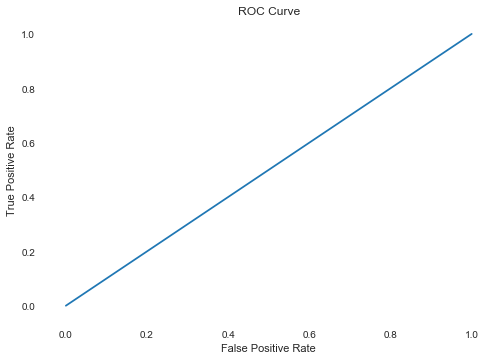

Area Under the Curve: 0.500000 



In [85]:
fpr,tpr,threshold=roc_curve(y_test,knnp2[:,1])
roc_auc=auc(fpr,tpr)
#print('FPR:','\n', fpr ,'\n','\n','TPR:','\n', tpr)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("Area Under the Curve: %f" % roc_auc,"\n")

**Inference**

The diagonal line indicates a random classifier. Generally, as we decrease the threshold, we move to the right and upwards along the curve. With a threshold of 1.0, we would be in the lower left of the graph because we identify no data points as positives leading to no true positives and no false positives (TPR = FPR = 0). As we decrease the threshold, we identify more data points as positive, leading to more true positives, but also more false positives (the TPR and FPR increase). Eventually, at a threshold of 0.0 we identify all data points as positive and find ourselves in the upper right corner of the ROC curve (TPR = FPR = 1.0).

At a threshold of 1.0, we classify all the customers are the non buyers of the personal loan and hence have a recall and precision of 0.0. As the threshold decreases, the recall increases because we identify more customers as buyers. However, with increase in the true positives, we increase the false positives, the precision will be <1 as the recall reaches 1. At a threshold of 0.0, our recall is perfect — we find all customers who are buyers.

Accuracy 91% and AUC is 0.5, which are not siginificant and hence we need to try other models.
Also, to fit the data into GridSearchCV is very time consuming and it costs heavy CPU effort and memory.

**Naive Bayes**

Bayes theorem uses the conditional probability of an event. Events should be mutually exclusive like throwing a dice.
Bayes Theorem assumes predictors or input features are independent of each other.
Bayesian probability relates to the degree of belief. It gives the likelihood of an event to occur. It does this with prior knowledge of the condition related to the event. 

Build Naive Bayes Classifier on training Dataset

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
nbm=GaussianNB()
nbm.fit(scaled_x_train,y_train)
y_pred=nbm.predict(scaled_x_test)

Print the accuracy of the model & confusion Matrix for Naïve Bayes Model.

Explain Precision, Recall value & F1 Score using the classification report.

In [88]:
AS4=accuracy_score(y_test,y_pred)
CM4=confusion_matrix(y_test,y_pred)
CR4=classification_report(y_test,y_pred)
print('Accuracy Score: ', '\n', AS4,'\n')
print('Confusion Matrix: ','\n', CM4,'\n')
print('Classification Report: ','\n', CR4,'\n')

Accuracy Score:  
 0.8944860449285228 

Confusion Matrix:  
 [[1238  103]
 [  52   76]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469
 



Calculate the probabilities of predictions made & then plot the ROC Curve.

Calculate the fpr and tpr for all thresholds of the classification.

In [89]:
nbp=nbm.predict_proba(scaled_x_test)

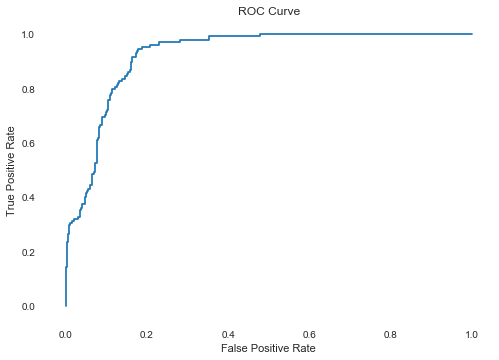

Area Under the Curve: 0.924240 



In [90]:
fpr4,tpr4,threshold4=roc_curve(y_test,nbp[:,1])
roc_auc4=auc(fpr4,tpr4)
#print('FPR:','\n', fpr4 ,'\n','\n','TPR:','\n', tpr4)
plt.plot(fpr4, tpr4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("Area Under the Curve: %f" % roc_auc4,"\n")

**Inference**

90% accuracy which is less than logistic and kNN regressions.

59% Recall value which is less than kNN regression.

93% AUC which is less than logistic regression but better than kNN regression.

Naive Bayes may be not a better classifier for this data set compared to other models because of less accuracy and less Recall value.

**6. Print the confusion matrix for all the above models (5 marks)**

In [91]:
print("Logistic","\n",CM2)
print("KNearestNeighbor","\n",CM3)
print("NaiveBayes","\n", CM4)

Logistic 
 [[1324   17]
 [  52   76]]
KNearestNeighbor 
 [[1333    8]
 [  44   84]]
NaiveBayes 
 [[1238  103]
 [  52   76]]


**7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)**

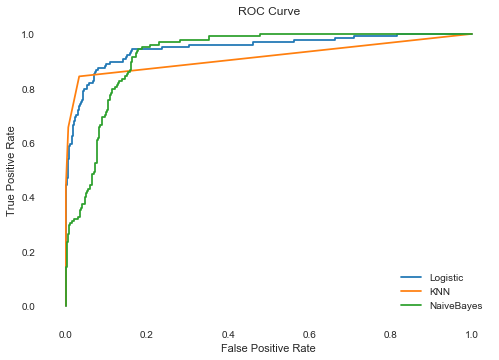

Area Under the Curve:
Logistic: 0.949501
KNearestNeighbor: 0.915024
NaiveBayes: 0.924240 


In [92]:
plt.plot(fpr2, tpr2,label='Logistic')
plt.plot(fpr3, tpr3,label='KNN')
plt.plot(fpr4, tpr4,label='NaiveBayes')
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show() 
print("Area Under the Curve:")
print("Logistic: %f" % roc_auc2)
print("KNearestNeighbor: %f" % roc_auc3)
print("NaiveBayes: %f " % roc_auc4)

**Inferences**

Logistic Regression shows the better AUC which represents the best fit algorithm among the three. 

If we consider Recall Value, it is higher for the KNN at 66% while the other two are at 59%, which means KNN model did much better in predicting the Buyers.

When compared the Accuracy, KNN has 97% while Logistic has 95% and NaiveBayes has 90%.

Overall, KNN shows the better prediction of the likelyhood of customers buying personal loans.

**Next Step**

Evaluate SVM to find how better it can predict compared to above three models.

In [93]:
from sklearn import svm

In [94]:
# Before Standardization
svc = svm.SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.92


In [95]:
# After Standardization
svc = svm.SVC()
svc.fit(scaled_x_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_x_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.98


Scaling the data made a huge difference, 6% improvement on test set. Train data is made little underfitting, but training and test set performance are made quite similar.

In [96]:
svmm=svm.SVC(C=3,kernel='rbf',probability=True)
svmm.fit(scaled_x_train,y_train)
y_pred=svmm.predict(scaled_x_test)

In [97]:
AS5=accuracy_score(y_test,y_pred)
CM5=confusion_matrix(y_test,y_pred)
CR5=classification_report(y_test,y_pred)
print('Accuracy Score: ', '\n', AS5,'\n')
print('Confusion Matrix: ','\n', CM5,'\n')
print('Classification Report: ','\n', CR5,'\n')

Accuracy Score:  
 0.9809394145677331 

Confusion Matrix:  
 [[1335    6]
 [  22  106]] 

Classification Report:  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       0.95      0.83      0.88       128

    accuracy                           0.98      1469
   macro avg       0.97      0.91      0.94      1469
weighted avg       0.98      0.98      0.98      1469
 



In [98]:
svmp=svmm.predict_proba(scaled_x_test)

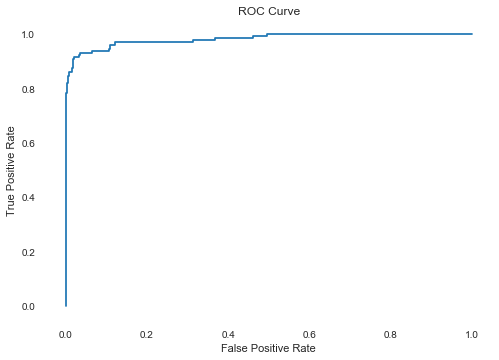

Area Under the Curve: 0.981369 



In [99]:
fpr5,tpr5,threshold5=roc_curve(y_test,svmp[:,1])
roc_auc5=auc(fpr5,tpr5)
#print('FPR:','\n', fpr5 ,'\n','\n','TPR:','\n', tpr5)
plt.plot(fpr5, tpr5)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("Area Under the Curve: %f" % roc_auc5,"\n")

**Inferences:**
Accuracy: 98% , Recall Value: 83% (for Buyer), AUC: 98%, which are higher than the above three models.

Hence, SVM shows the better prediction of the likelihood of a customer buying personal loans.